In [172]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


# Preprocesado y modelado
# ==============================================================================
import scipy.stats as stats
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [152]:
url = "https://raw.githubusercontent.com/Catrilao/tareasBD3/refs/heads/main/speeddating.csv"

dataset = pd.read_csv(url)

In [153]:
columnas_seleccionadas = [
    'attractive',
    'sincere',
    'intelligence',
    'funny',
    'ambition',
    'attractive_o',
    'sinsere_o',
    'intelligence_o',
    'funny_o',
    'ambitous_o',
    'pref_o_attractive',
    'pref_o_sincere',
    'pref_o_intelligence',
    'pref_o_funny',
    'pref_o_ambitious',
    'pref_o_shared_interests',
    'match',
    'decision',
    'decision_o',
    'gender',
    'age',
    'age_o',
    'sports',
    'tvsports',
    'exercise',
    'dining',
    'museums',
    'art',
    'hiking',
    'gaming',
    'clubbing',
    'reading',
    'tv',
    'theater',
    'movies',
    'concerts',
    'music',
    'shopping',
    'yoga'
]

data = dataset[columnas_seleccionadas]
data

,attractive,sincere,intelligence,funny,ambition,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,...,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,6,8,8,8,7,6,8,8,8,8,...,1,5,6,9,1,10,10,9,8,1
1,6,8,8,8,7,7,8,10,7,7,...,1,5,6,9,1,10,10,9,8,1
2,6,8,8,8,7,10,10,10,10,10,...,1,5,6,9,1,10,10,9,8,1
3,6,8,8,8,7,7,8,9,8,9,...,1,5,6,9,1,10,10,9,8,1
4,6,8,8,8,7,8,7,9,6,9,...,1,5,6,9,1,10,10,9,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,8,7,6,7,7,10,5,3,2,6,...,1,9,8,3,7,9,10,10,7,3
8374,8,7,6,7,7,6,3,7,3,7,...,1,9,8,3,7,9,10,10,7,3
8375,8,7,6,7,7,2,1,2,2,2,...,1,9,8,3,7,9,10,10,7,3
8376,8,7,6,7,7,5,7,5,5,3,...,1,9,8,3,7,9,10,10,7,3


# Limpieza de datos

In [154]:
info_data = pd.DataFrame({
    'Tipo de Dato': data.dtypes,
    'Valores Nulos': data.isnull().sum(),
    '"?" como valor': data[data == '?'].count(),
})

info_data

,Tipo de Dato,Valores Nulos,"""?"" como valor"
attractive,object,0,105
sincere,object,0,105
intelligence,object,0,105
funny,object,0,105
ambition,object,0,105
attractive_o,object,0,212
sinsere_o,object,0,287
intelligence_o,object,0,306
funny_o,object,0,360
ambitous_o,object,0,722


El dataframe `info_data` muestra que la mayoria de las columnas son de tipo `object`, pero si observamos los datos dentro de esas colummnas podemos ver que son números, esto coincide con la obtención de los datos ya que, son puntuaciones entregadas por los participantes del estudio.

Por lo que transformaremos todas las columnas de `data` a númericas y para tratar con los valores "?", los reemplazaremos con la media de la columna.

In [155]:
# Transformación de las columnas `object` a numericas
data.replace('?', np.nan, inplace=True)

for column in data:
  if data[column].dtype == 'object' and column != 'gender':
    data.loc[:, column] = pd.to_numeric(data[column], errors='coerce')
    data.loc[:, column] = data[column].fillna(data[column].mean())

data.loc[:, 'gender'] = data['gender'].map({'female': 0, 'male': 1})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   attractive               8378 non-null   object
 1   sincere                  8378 non-null   object
 2   intelligence             8378 non-null   object
 3   funny                    8378 non-null   object
 4   ambition                 8378 non-null   object
 5   attractive_o             8378 non-null   object
 6   sinsere_o                8378 non-null   object
 7   intelligence_o           8378 non-null   object
 8   funny_o                  8378 non-null   object
 9   ambitous_o               8378 non-null   object
 10  pref_o_attractive        8378 non-null   object
 11  pref_o_sincere           8378 non-null   object
 12  pref_o_intelligence      8378 non-null   object
 13  pref_o_funny             8378 non-null   object
 14  pref_o_ambitious         8378 non-null  

In [156]:
info_data2 = pd.DataFrame({
    'Tipo de Dato': data.dtypes,
    'Valores Nulos': data.isnull().sum(),
    '"?" como valor': data[data == '?'].count(),
})

info_data2

,Tipo de Dato,Valores Nulos,"""?"" como valor"
attractive,object,0,0
sincere,object,0,0
intelligence,object,0,0
funny,object,0,0
ambition,object,0,0
attractive_o,object,0,0
sinsere_o,object,0,0
intelligence_o,object,0,0
funny_o,object,0,0
ambitous_o,object,0,0


## Normalización de los datos

In [160]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Hierarchical clustering

In [158]:
# Esta función extrae la información de un modelo AgglomerativeClustering
# y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

## Matriz de distancias

Como nuestros datos son numéricos, la matriz de distancias la haremos usando la distancia euclidiana.

Esta métrica de distancia penaliza de manera lineal las diferencias en todas las dimensiones. Permitiendo que se agrupen las observaciones más cercanas, destacando similitudes generales.

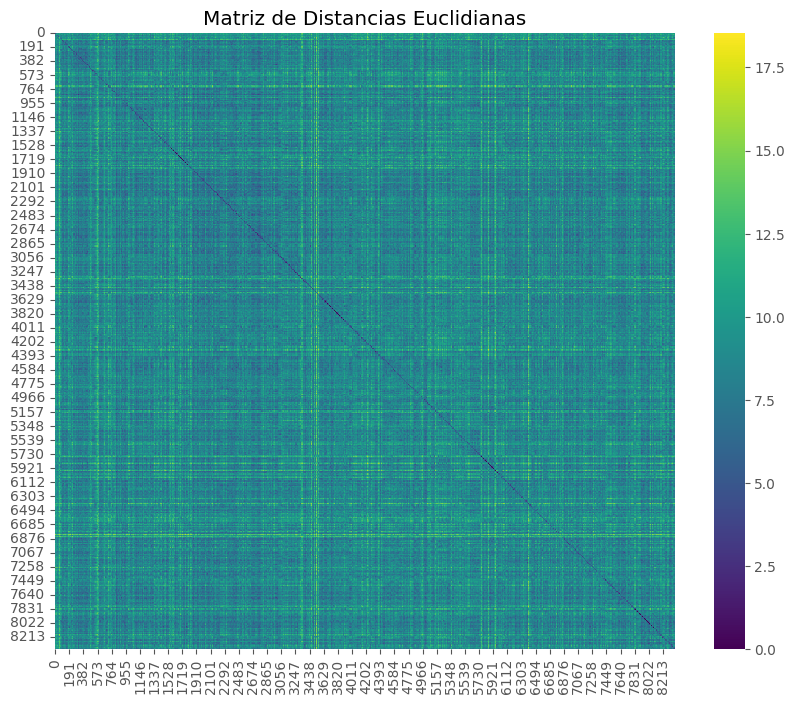

In [ ]:
distance_matrix = pdist(data_scaled, metric='euclidean')
distance_matrix_square = squareform(distance_matrix)

distance_matrix_df = pd.DataFrame(distance_matrix_square, 
                                  index=data_scaled.index, 
                                  columns=data_scaled.index)

plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix_df, cmap='viridis')
plt.title('Matriz de Distancias Euclidianas')
plt.show()

Vemos una distribución dispersa, donde no se observan patrones de bloques claramente, esto sugiere una diversidad en los datos. A continuación encontraremos grupos usando hierarchical clustering de tipo aglomerativo

Crearemos tres hierarchical clustering y luego compararemos sus dendroramas.

In [163]:
modelo_hclust_complete = AgglomerativeClustering(
                            metric   = 'euclidean',
                            linkage  = 'complete',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_complete.fit(X=data_scaled)

modelo_hclust_average = AgglomerativeClustering(
                            metric   = 'euclidean',
                            linkage  = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_average.fit(X=data_scaled)

modelo_hclust_ward = AgglomerativeClustering(
                            metric   = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_ward.fit(X=data_scaled)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

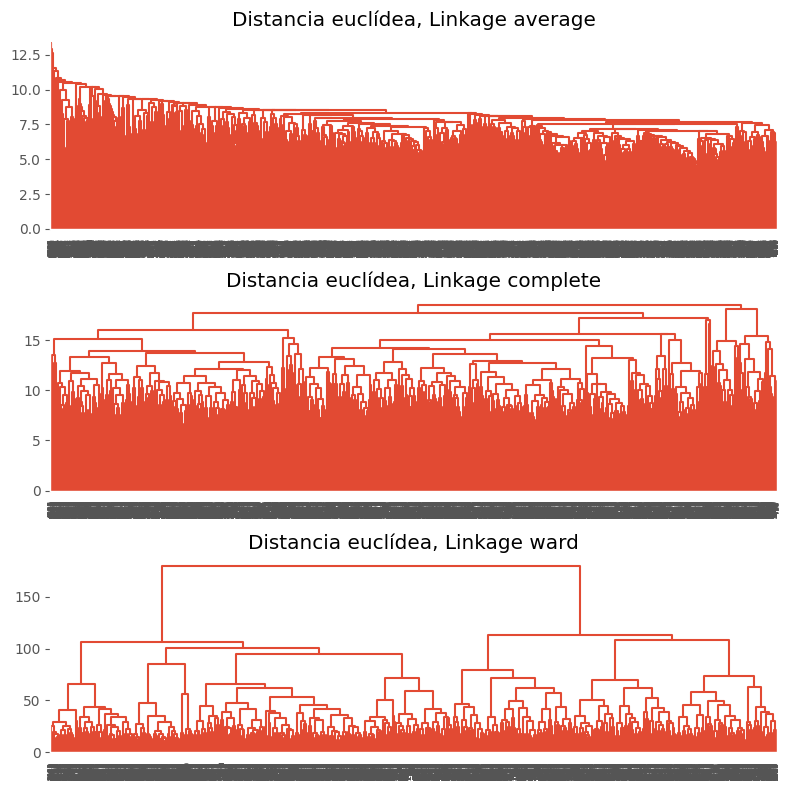

In [164]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

plot_dendrogram(modelo_hclust_average, color_threshold=0, ax=axs[0])
axs[0].set_title("Distancia euclídea, Linkage average")

plot_dendrogram(modelo_hclust_complete, color_threshold=0, ax=axs[1])
axs[1].set_title("Distancia euclídea, Linkage complete")

plot_dendrogram(modelo_hclust_ward, color_threshold=0, ax=axs[2])
axs[2].set_title("Distancia euclídea, Linkage ward")
plt.tight_layout()

Vemos que en el modelo que uso linkage ward, se diferencian mejor los grupos. La celda siguiente muestra una mejor visualización de este. Esta vez usaremos la matriz de distancias mostrada con anterioridad.

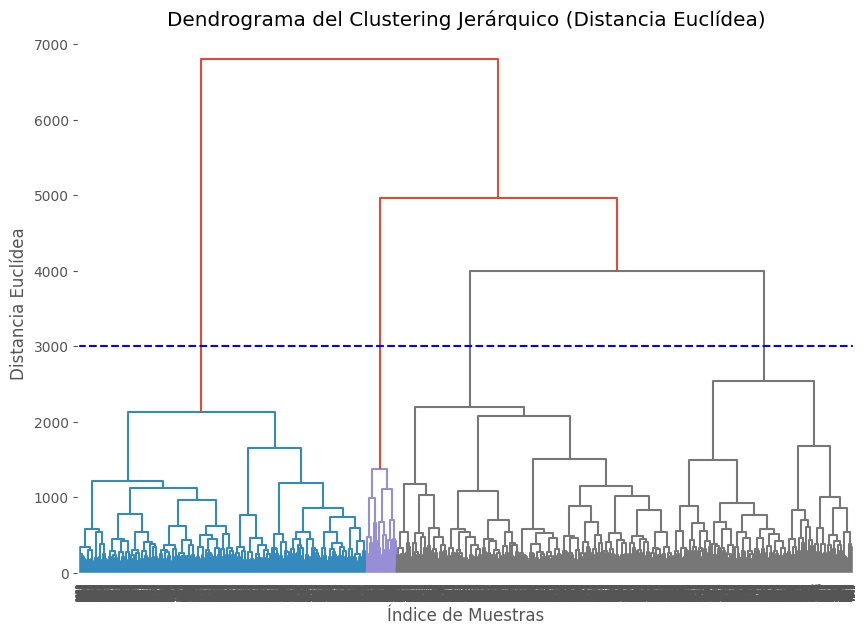

In [171]:
Z = linkage(distance_matrix_square, method='ward')
umbral = 3000

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.axhline(y=umbral, color='b', linestyle='--', label=f'Umbral: {umbral}')
plt.title('Dendrograma del Clustering Jerárquico (Distancia Euclídea)')
plt.xlabel('Índice de Muestras')
plt.ylabel('Distancia Euclídea')
plt.show()

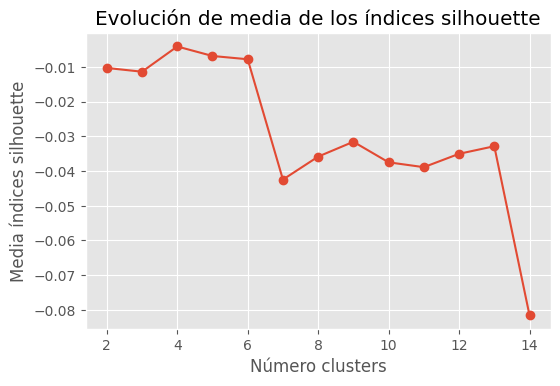

In [173]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

# Calcular el índice de silueta para diferentes números de clusters
for n_clusters in range_n_clusters:
    # Usar fcluster para asignar etiquetas de clusters
    cluster_labels = fcluster(Z, t=n_clusters, criterion='maxclust')
    
    # Calcular el índice de silueta usando las etiquetas generadas
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

# Graficar la evolución del índice de silueta
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')
plt.show()

In [177]:
modelo_final = AgglomerativeClustering(
                            metric     = 'euclidean',
                            linkage    = 'ward',
                            n_clusters = 4
                     )
modelo_final.fit(X=data_scaled)

clusters = modelo_final.fit(data_scaled)
data_scaled["cluster"] = modelo_final.labels_

In [179]:
cluster_resumen = data_scaled.groupby("cluster").mean()
cluster_resumen

,attractive,sincere,intelligence,funny,ambition,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,...,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.100917,0.129236,0.179216,-0.019918,0.101641,0.128654,0.062644,0.007635,0.084988,-0.016566,...,-0.077633,0.096368,0.162779,0.248889,0.370367,0.278688,0.263902,0.197297,0.373551,0.240084
1,-0.359464,-0.215054,-0.656633,-0.379836,-0.559595,0.013432,0.057253,0.088124,-0.005533,0.091243,...,-0.298172,-0.352690,-0.500157,-0.578634,-0.997989,-0.886706,-0.775592,-0.713473,-0.951412,-0.640605
2,-0.555358,-0.333690,-0.627094,-0.124956,-0.382684,-0.472037,-0.285432,-0.194686,-0.416770,-0.194807,...,0.251447,0.018777,0.027813,-0.324947,0.022789,0.165627,0.334956,0.170479,-0.395797,-0.109875
3,0.587823,0.089308,0.651634,0.579563,0.578152,0.032359,0.030997,0.109086,0.154745,0.199045,...,0.294001,-0.055971,-0.180855,-0.034148,-0.498256,-0.415351,-0.657292,-0.273338,-0.077299,-0.186834


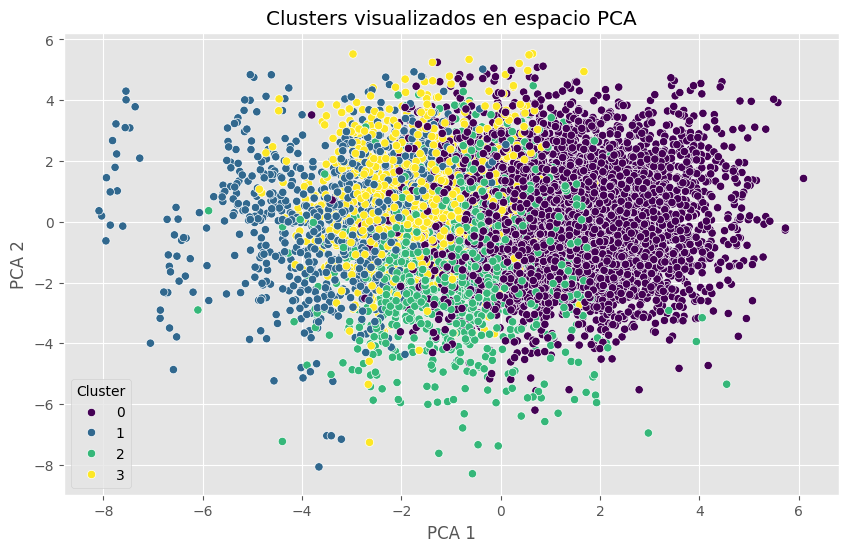

In [182]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(data_scaled) 
X_pca = pd.DataFrame(X_pca) 
X_pca.columns = ['P1', 'P2'] 

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca["P1"], y=X_pca["P2"], hue=data_scaled["cluster"], palette="viridis")
plt.title("Clusters visualizados en espacio PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()